In [1]:
%matplotlib inline
from ecell4 import *
import numpy as np
import math
import matplotlib.pyplot as plt

factor = 100
run = 30

voxelr = 0.05  
D = 1
kd= 4.0*math.pi*D*4*voxelr
ka = 10*kd
kon = (ka*kd)/(ka+kd)
print('kd',kd,'ka', ka,'kon', kon)

T = 200
conc = 0.05

L = voxelr*factor*2
print 'L',L
print 'rv',voxelr
V1 = L**3
V2 =  spatiocyte.SpatiocyteWorld(ones()*L,voxelr).get_volume()
Ls = (V2)**(1./3)
print 'Ls',Ls
N = int(conc*V2)

phi = (100*2*N*4.*math.pi*(voxelr**3)/(3*V2)) 
print 'no of a',N
print 'no of b',N
print 'vol fract %',phi

with reaction_rules():#for ODE
    A + B > C | kon

m1 = get_model()

with species_attributes():
    A |B |C| {'D': str(D), 'radius':str(voxelr)}

with reaction_rules():#for spa and egfrd
    A + B > C | ka

m2 = get_model()

ode = np.array(run_simulation(T, model=m1, y0={'A': N,'B': N}, solver='ode', volume=V2, return_type='array'))
to = ode[:,0]
nao = ode[:,1]
#plt.plot(to,nao,'g')

('kd', 2.5132741228718345, 'ka', 25.132741228718345, 'kon', 2.284794657156213)
L 10.0
rv 0.05
Ls 10.1232885531
no of a 51
no of b 51
vol fract % 0.00514794556238


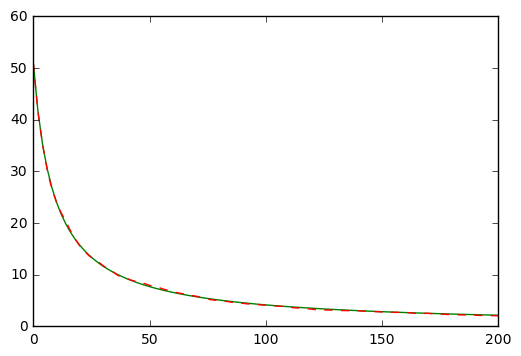

In [2]:

spa = np.array(ensemble_simulations(2*run, T, y0={"A": N,'B': N}, model=m2, solver=("spatiocyte", voxelr), volume=V1,return_type='array'))
ts = spa[0][0][:,0]
nas = np.mean(spa[0][:,:,1],axis=0)

plt.plot(to,nao,'g')
plt.plot(ts,nas,'r--')

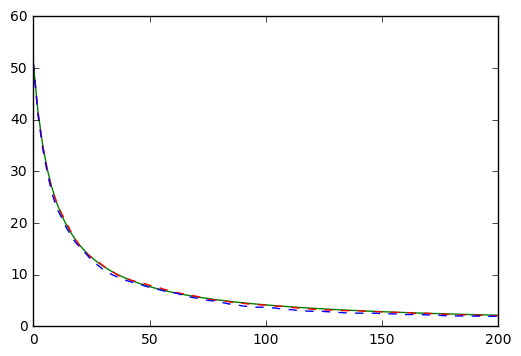

In [3]:
eg = np.array(ensemble_simulations(run, T, y0={"A": N,'B': N}, model=m2, solver=("egfrd", Integer3(3,3,3)), volume=V2,return_type='array'))
te = eg[0][0][:,0]
nae = np.mean(eg[0][:,:,1],axis=0)

plt.plot(to,nao,'g')
plt.plot(ts,nas,'r--')
plt.plot(te,nae,'b--')

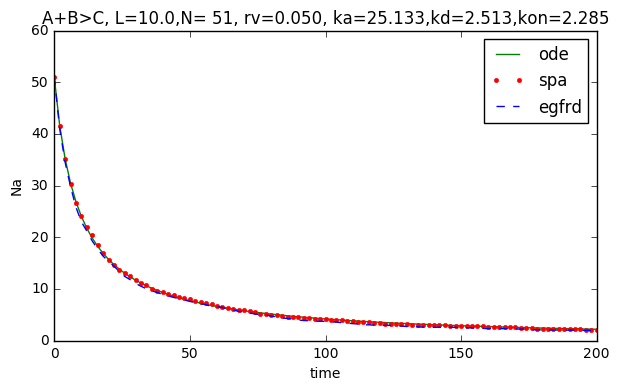

In [4]:
plt.plot(to,nao,'g',label='ode')
plt.plot(ts,nas,'r.',label='spa')
plt.plot(te,nae,'b--',label='egfrd')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('Na')
fig = plt.gcf()
fig.set_size_inches(7,4)
plt.title('A+B>C, L={0:0.1f},N={1:3.0f}, rv={2:0.3f}, ka={3:0.3f},kd={4:0.3f},kon={5:0.3f}'.format(L,N,voxelr,ka,kd,kon))
plt.savefig("figure/2ndodr_irr_Difflim_L{0:0.1f}_rv{1:0.2f}.png".format(L,voxelr),format='png',dpi=100)

In [5]:
#stack = np.column_stack((timespa,Nam))
#filename = open('output/Dlim_spa_2ndorder_irr_L1_kakd5.csv','w')
#np.savetxt(filename,stack,fmt='%s')
#filename.close()